# Week 9 - Multivariate Analysis, part 2

# 1. Lesson - no lesson this week

# 2. Weekly graph question

The graph below plots the first two principal component scores in a scatter plot.  What can be said about the three outliers in the upper left corner of the graph?  Is their first principal component score high or low?  What about their second principal component score?  What does that mean about their values in series_1, series_2, and series_3?  It seems to me that you can say something about series_3 (what can you say?) but you may have a harder time saying something about series_1 and series_2, and an almost impossible time saying anything about the relative values of series_1 and series_2.  Why is that?  How are series_1 and series_2 related, according to how they were created?  If you like, try drawing a pairplot for all three series and see what you get.

Overall, what are the advantages and disadvantages of the graph below?  Does it show anything interesting?

[0.79916477 0.18990532 0.01092991]
[[ 0.26541493  0.30096233  0.91595665]
 [ 0.60337553  0.6891417  -0.40127506]
 [ 0.75199261 -0.65917023 -0.00131519]]


Text(0, 0.5, 'Second Principal Component Score')

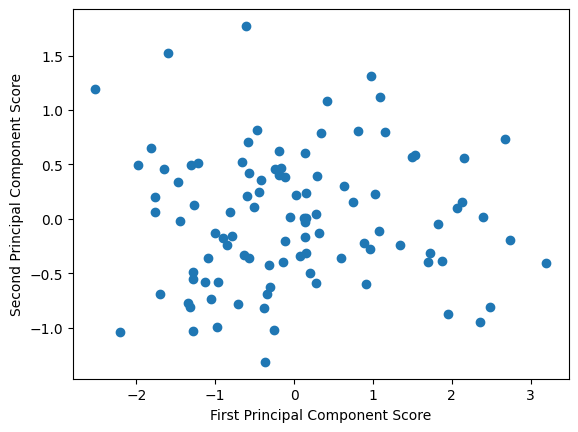

In [2]:
import numpy as np
import pandas as pd
from sklearn import decomposition
import matplotlib.pyplot as plt

np.random.seed(0)
num_points = 100
series_1 = np.random.normal(loc = 2, scale = 0.5, size = num_points)
series_2 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.1, size = num_points))
series_3 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.5, size = num_points))
df = pd.DataFrame({'ser1': series_1, 'ser2': series_2, 'ser3': series_3})
df = df - df.mean() # set mean to zero, so we don't have to subtract mean from the principal component scores

pca3 = decomposition.PCA(n_components = 3)
pca3.fit(df)
print(pca3.explained_variance_ratio_)
print(pca3.components_)

first_principal_component_score = df.dot(pca3.components_[0])
second_principal_component_score = df.dot(pca3.components_[1])
plt.scatter(first_principal_component_score, second_principal_component_score)
plt.xlabel("First Principal Component Score")
plt.ylabel("Second Principal Component Score")

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

Here are some types of analysis you can do:
Draw heatmaps.

Draw bubble plots.

Perform Principal Component Analysis to find out the directions in which the data varies.  Can you represent the data using only its projection onto its first principal component, using the methods described in Week 8?  How much of the variance would this capture?

Try performing linear regression analysis using different sets of features.  Which features seem most likely to be useful to predict other features?

Conclusions:
Explain what conclusions you would draw from this analysis: are the data what you expect? Are the data likely to be usable? If the data are not useable, find some new data!

Do you see any outliers? (Data points that are far from the rest of the data).

Does the Principal Component Analysis suggest a way to represent the data using fewer dimensions than usual - using its first one or two principal component scores, perhaps?

Try using your correlation information from previous weeks to help choose features for linear regression.

In [5]:
# load the heart disease dataset 
df = pd.read_csv("heart_dataset.zip")
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


Feature Columns: 

'age' = age measured in years 

'sex' = 1=male; 0=female

'cp' = chest pain type 

'trestbps' = resting blood pressure in mmHg

'chol' = serum cholesterol level in mg/dl

'fbs = fasting blood sugar level above 120 mg/dl(1 = true, 0 = false)

'restecg' = resting electrocardiographic results (values 0,1,2)

'thalach' = maximum heart rate achieved 

'exang' = exercise induced angina (1=yes, 0=no)

'oldpeak' = ST depression induced by exercise relative to rest 

'slope' = slope of the peak exercise ST segment

'ca' = number of major vesels (0-3) colored by flouroscopy 

'thal' = measure of defect (1=normal, 2=fixed defect, 3=reversable defect)

'target' = presence of heart disease or not (0=no heart disease, 1= heart disease)


Dataset: This dataset utilizes data from 4 databases including Switzerland, Hungary, Cleveland, and Long Beach. From these 4 datasets 14 attributes were selected to analyze. The goal of this dataset is to determine which attributes have the most influence on the target feature and can hopefully be used to determine which patients are prone to developing heart disease. 

In [7]:
# correlation matrix 
corr_matrix = df.corr()
print(corr_matrix)


               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.103240 -0.071966  0.271121  0.219823  0.121243   
sex      -0.103240  1.000000 -0.041119 -0.078974 -0.198258  0.027200   
cp       -0.071966 -0.041119  1.000000  0.038177 -0.081641  0.079294   
trestbps  0.271121 -0.078974  0.038177  1.000000  0.127977  0.181767   
chol      0.219823 -0.198258 -0.081641  0.127977  1.000000  0.026917   
fbs       0.121243  0.027200  0.079294  0.181767  0.026917  1.000000   
restecg  -0.132696 -0.055117  0.043581 -0.123794 -0.147410 -0.104051   
thalach  -0.390227 -0.049365  0.306839 -0.039264 -0.021772 -0.008866   
exang     0.088163  0.139157 -0.401513  0.061197  0.067382  0.049261   
oldpeak   0.208137  0.084687 -0.174733  0.187434  0.064880  0.010859   
slope    -0.169105 -0.026666  0.131633 -0.120445 -0.014248 -0.061902   
ca        0.271551  0.111729 -0.176206  0.104554  0.074259  0.137156   
thal      0.072297  0.198424 -0.163341  0.059276  0.100244 -0.04

Text(0.5, 1.0, 'Heat Disease Dataset Heatmap')

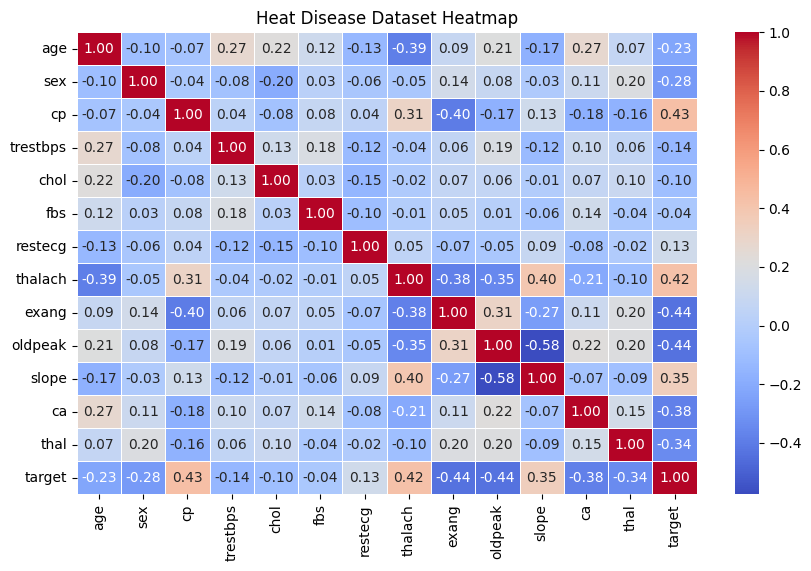

In [37]:
# heatmap of features 
import seaborn as sns 
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f', linewidth = 0.5)
plt.title('Heat Disease Dataset Heatmap')

This heatmap indicates that none of the features have extremely strong correlationsthe but the features with the highest correlation are 'cp' and 'target'. The correlation value between 'cp' and 'target' is 0.43. In addition to this, features 'oldpeak' and 'exang' both have strong negative correlations with 'target' and correlation coefficients of -0.44 which indicates a pontential strong inverse relationship. 

/tmp/ipykernel_5874/1370562812.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df['age'], df['chol'], s=df['age'], cmap='viridis', alpha=0.6, linewidth=2)


Text(0, 0.5, 'Cholesterol')

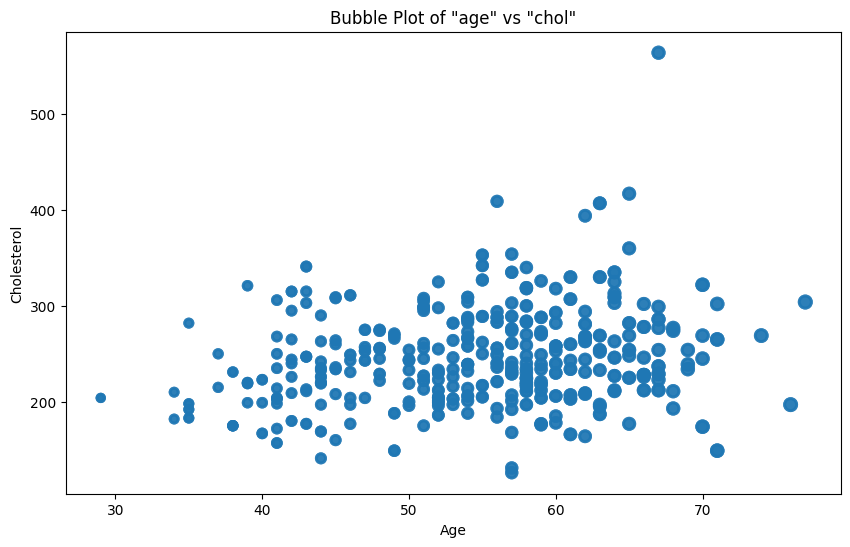

In [35]:
# bubble plot of age vs cholesterol with size = 'target'

plt.figure(figsize=(10,6))
plt.scatter(df['age'], df['chol'], s=df['age'], cmap='viridis', alpha=0.6, linewidth=2)
plt.title('Bubble Plot of "age" vs "chol"')
plt.xlabel('Age')
plt.ylabel('Cholesterol')

This bubble plot indicates that cholesterol levels increase with increased age. 

Variance Explained by First Component: 23.67%


Text(0.5, 1.0, 'Data from First Principle Component')

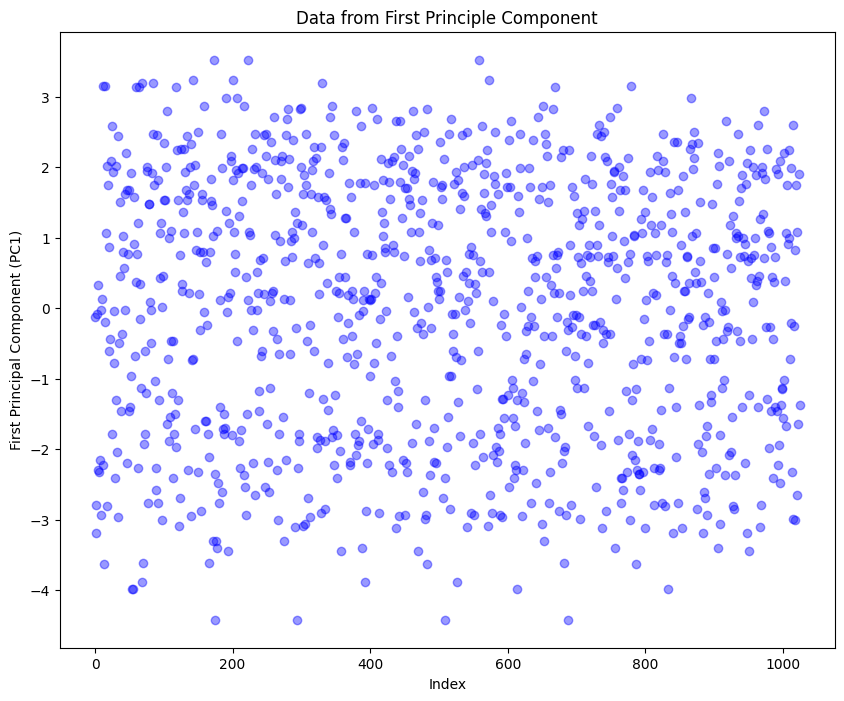

In [49]:
#PCA 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
pca = PCA(n_components=1)
pca_result = pca.fit_transform(df_scaled)

variance = pca.explained_variance_ratio_[0]
print(f"Variance Explained by First Component: {variance * 100:.2f}%")

df_pc1 = pd.DataFrame(data=pca_result, columns=['PCA1'])

plt.figure(figsize=(10,8))
plt.scatter(df_pc1.index, df_pc1['PCA1'], c='blue', alpha=0.4)
plt.xlabel('Index')
plt.ylabel('First Principal Component (PC1)')
plt.title('Data from First Principle Component')

# df_pca = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])
# plt.figure(figsize=(8,6))
# plt.scatter(df_pca['PCA1'], df_pca['PCA2'])

Using the First Principal Component, we can capture 23.67% of the total variance. The closer this value is to 100% the more of the variance is explained. 23.67% is not very high so only about a quarter of the data can be explained using Principal Component 1. 

In [61]:
# linear regression analysis of data 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#print(df.describe())

X = df.drop(df['target'])[:1023]
y = df['target'][:1023]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(y_pred[:10])

mse = mean_squared_error(y_test, y_pred)
print(f"MSE Score: {mse}")

r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2}")


[0.48261161 0.67849476 0.56372008 0.53998032 0.5826048  0.5051588
 0.5082049  0.53341209 0.49314808 0.67965832]
MSE Score: 0.25708506814818727
R2 Score: -0.028952379897864144


The MSE score is quite low which indicates a good fit for the model. However the R2 value is quite low. We want the R2 value to be close to 1 so this indicates a poorly fit model that does not adapt to new data well. This model might be overfit.

In [62]:
# find outliers in data 

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1

lower_bound = Q1 -1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (df < lower_bound ) | (df > upper_bound)
outlier_rows = df[outliers.any(axis=1)]
print('Outlier Rows', outlier_rows)

Outlier Rows       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
1      53    1   0       140   203    1        0      155      1      3.1   
4      62    0   0       138   294    1        1      106      0      1.9   
6      58    1   0       114   318    0        2      140      0      4.4   
11     43    0   0       132   341    1        0      136      1      3.0   
13     51    1   0       140   298    0        1      122      1      4.2   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1003   52    1   0       108   233    1        1      147      0      0.1   
1006   58    1   2       140   211    1        0      165      0      0.0   
1013   58    1   0       114   318    0        2      140      0      4.4   
1015   58    1   0       128   216    0        0      131      1      2.2   
1016   65    1   3       138   282    1        0      174      0      1.4   

      slope  ca  thal  target  
1         0   0     3       0 

There are 254 rows out of a total of 1023 that have outliers present in the data. This is not surprising since healthcare data consistently has outliers due to different medical conditions, or different physician documentation. 


# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 136-150 of the Storytelling With Data book as best you can. ("The power of super-categories" to the end of chapter 5). You do not have to get the exact data values right, just the overall look and feel.

               segment 1  segment 2  segment 3  segment 4  segment 5  \
region                                                                 
US Population       16.0        7.0       10.0       10.0       10.0   
Our Customers        9.0       10.0       15.0       18.0       17.0   

               segment 6  segment 7  
region                               
US Population       32.0       15.0  
Our Customers       20.0       11.0  


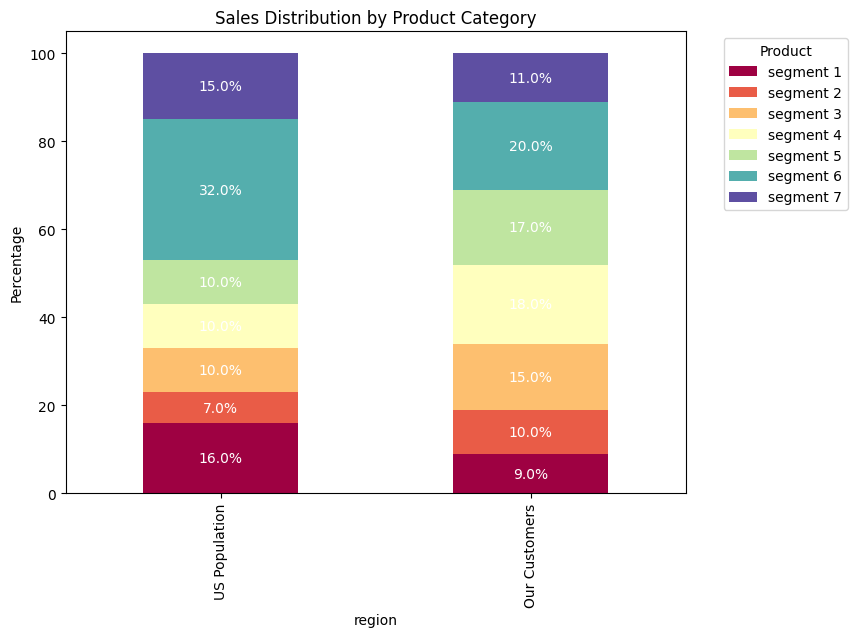

In [69]:
data = {
    'region': ['US Population', 'Our Customers'], 
    'segment 1': [16, 9], 
    'segment 2': [7,10], 
    'segment 3': [10,15], 
    'segment 4': [10, 18], 
    'segment 5': [10,17], 
    'segment 6': [32, 20], 
    'segment 7': [15, 11]
}

df = pd.DataFrame(data)
df.set_index('region', inplace=True)
df_percentage = df.div(df.sum(axis=1), axis=0) * 100
print(df_percentage)

fig, ax = plt.subplots(figsize=(8, 6))
df_percentage.plot(kind='bar', stacked=True, ax=ax, colormap='Spectral')

for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x() + width / 2
    y = p.get_y() + height / 2
    percentage = f'{height:.1f}%'
    ax.text(x, y, percentage, ha='center', va='center', color='white', fontsize=10)
ax.set_ylabel('Percentage')
ax.set_title('Sales Distribution by Product Category')
ax.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
